In [397]:
import pandas as pd

In [398]:
coursera = pd.read_csv("C:/Users/pietr/Desktop/DA_Touring/Data_Visualisation/coursea_data.csv")

coursera.columns

Index(['Unnamed: 0', 'course_title', 'course_organization',
       'course_Certificate_type', 'course_rating', 'course_difficulty',
       'course_students_enrolled'],
      dtype='object')

In [399]:
coursera.describe()

,Unnamed: 0,course_rating
count,891.000000,891.000000
mean,445.000000,4.677329
std,257.353842,0.162225
min,0.000000,3.300000
25%,222.500000,4.600000
50%,445.000000,4.700000
75%,667.500000,4.800000
max,890.000000,5.000000


In [400]:
coursera.dropna()

#same number of rows, it means that none was dropped, hence no NaN number

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
...,...,...,...,...,...,...,...
886,236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
887,883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
888,545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
889,875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k


In [401]:
coursera = coursera.drop(columns="Unnamed: 0")

In [402]:
#we check if any NAN value in the columns

nan_index_1 = coursera.loc[pd.isna(coursera["course_title"]),:].index

nan_index_1


Index([], dtype='int64')

In [403]:
nan_index_2 = coursera.loc[pd.isna(coursera["course_organization"]),:].index

nan_index_2

Index([], dtype='int64')

In [404]:
nan_index_3 = coursera.loc[pd.isna(coursera["course_Certificate_type"]),:].index

nan_index_3

Index([], dtype='int64')

In [405]:
coursera["course_Certificate_type"].unique()

#consider the possibility to drop duplicates of a subset

#try to use map function to manipulate 

array(['SPECIALIZATION', 'COURSE', 'PROFESSIONAL CERTIFICATE'],
      dtype=object)

In [406]:
#there might be some duplicate when ti comes to tipe of course

coursera.duplicated() #same number of rows. no duplicate

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [407]:
pd.value_counts(coursera["course_organization"])

C:\Users\pietr\AppData\Local\Temp\ipykernel_2940\3559412453.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(coursera["course_organization"])


course_organization
University of Pennsylvania     59
University of Michigan         41
Google Cloud                   34
Duke University                28
Johns Hopkins University       28
                               ..
École des Ponts ParisTech       1
Tel Aviv University             1
The University of Hong Kong     1
École Polytechnique             1
Mail.Ru Group                   1
Name: count, Length: 154, dtype: int64

In [408]:
#look for outliers and use wishey representation
coursera["course_rating"].describe()

count    891.000000
mean       4.677329
std        0.162225
min        3.300000
25%        4.600000
50%        4.700000
75%        4.800000
max        5.000000
Name: course_rating, dtype: float64

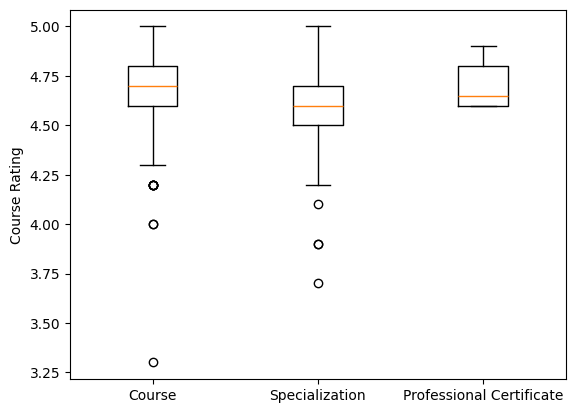

In [409]:
#boxplot representation

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

course_rating = [coursera["course_rating"].loc[coursera["course_Certificate_type"]=="COURSE"],coursera["course_rating"].loc[coursera["course_Certificate_type"]=="SPECIALIZATION"],coursera["course_rating"].loc[coursera["course_Certificate_type"]=="PROFESSIONAL CERTIFICATE"]]

labels = ["Course","Specialization","Professional Certificate"]

ax.set_ylabel("Course Rating")

ax.boxplot(course_rating, tick_labels=labels);

In [410]:
#define low and high fences of the boxplot for Course

q1_course = coursera["course_rating"].loc[coursera["course_Certificate_type"]=="COURSE"].quantile(0.25)
q3_course = coursera["course_rating"].loc[coursera["course_Certificate_type"]=="COURSE"].quantile(0.75)
iqr_course = q3_course - q1_course

low_fence_course = q1_course - 1.5*iqr_course
high_fence_course = q3_course + 1.5*iqr_course

print(f"COURSE low fence:{low_fence_course}\nCOURSE high fence:{high_fence_course}")



COURSE low fence:4.299999999999999
COURSE high fence:5.1


In [411]:
#identify the outliers for course rating

course_outliers = coursera.loc[(coursera["course_rating"]< 4.29) & (coursera["course_Certificate_type"] == "COURSE")]
course_outliers[["course_title","course_organization","course_rating"]]
course_outliers = course_outliers.rename(columns={"course_title":"Course Name","course_organization":"Institute","course_rating":"Rating"})
course_outliers[["Course Name","Institute","Rating"]]

,Course Name,Institute,Rating
182,Cybersecurity and Its Ten Domains,University System of Georgia,4.2
402,Hardware Description Languages for FPGA Design,University of Colorado Boulder,4.2
413,How To Create a Website in a Weekend! (Project...,The State University of New York,3.3
445,Instructional Design Foundations and Applications,University of Illinois at Urbana-Champaign,4.2
515,Introduction to Spreadsheets and Models,University of Pennsylvania,4.2
522,"Introduction to Trading, Machine Learning & GCP",New York Institute of Finance,4.0
590,Mastering Data Analysis in Excel,Duke University,4.2
598,Mathematics for Machine Learning: PCA,Imperial College London,4.0
676,Project Execution,"University of California, Irvine",4.2


In [412]:
#define low and high fences of the boxplot for Course

q1_splz = coursera["course_rating"].loc[coursera["course_Certificate_type"]=="SPECIALIZATION"].quantile(0.25)
q3_splz = coursera["course_rating"].loc[coursera["course_Certificate_type"]=="SPECIALIZATION"].quantile(0.75)
iqr_splz = q3_splz - q1_splz

low_fence_splz = q1_splz - 1.5*iqr_splz
high_fence_splz = q3_splz + 1.5*iqr_splz

course_outliers = coursera.loc[(coursera["course_rating"]< low_fence_splz) & (coursera["course_Certificate_type"] == "SPECIALIZATION")]
course_outliers[["course_title","course_organization","course_rating"]]
course_outliers = course_outliers.rename(columns={"course_title":"Course Name","course_organization":"Institute","course_rating":"Rating"})
course_outliers[["Course Name","Institute","Rating"]]

,Course Name,Institute,Rating
414,How to Start Your Own Business,Michigan State University,4.1
566,Machine Learning and Reinforcement Learning in...,New York University,3.7
569,Machine Learning for Trading,Google Cloud,3.9
873,iOS App Development with Swift,University of Toronto,3.9


In [413]:
#study categorical data with depiction
#counting correlation between course type, course difficulty and rating

rating_mean = coursera[["course_Certificate_type","course_rating"]].groupby(by="course_Certificate_type").mean()
rating_mean.index.names = ["Course Type"]
rating_mean.rename(columns={"course_rating":"Rating","course_Certificate_type":"Course Type"})


,Rating
Course Type,
COURSE,4.707045
PROFESSIONAL CERTIFICATE,4.700000
SPECIALIZATION,4.618182


In [414]:
#study categorical data with crosstab function

difficulty_level = coursera.rename(columns={"course_difficulty":"Difficulty"})

difficulty_level = pd.crosstab(index=coursera["course_Certificate_type"],columns=coursera["course_difficulty"])

difficulty_level.index.names = ["Course Type"]

difficulty_level.columns.names = ["Difficulty"]

difficulty_level = difficulty_level[["Beginner","Intermediate","Advanced","Mixed"]]

difficulty_level


Difficulty,Beginner,Intermediate,Advanced,Mixed
Course Type,,,,
COURSE,282,104,9,187
PROFESSIONAL CERTIFICATE,9,3,0,0
SPECIALIZATION,196,91,10,0


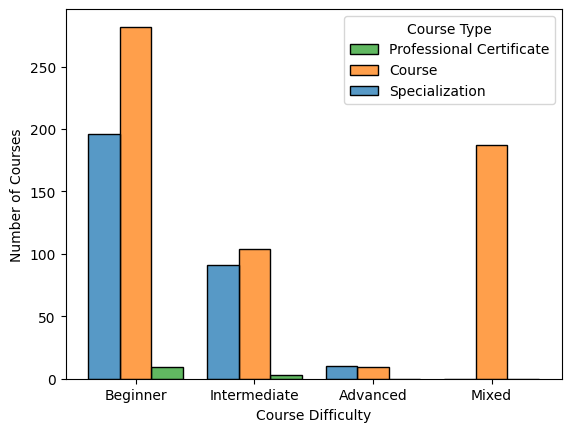

In [415]:
#create distribution with type of course and difficulty 

import seaborn as sns

coursera["course_difficulty"] = pd.Categorical(coursera["course_difficulty"],["Beginner","Intermediate","Advanced","Mixed"])

fig = sns.histplot(data=coursera,x="course_difficulty",hue="course_Certificate_type",multiple="dodge",shrink=0.8,stat="count",legend=True)

fig.set(xlabel="Course Difficulty",ylabel="Number of Courses")

plt.legend(["Professional Certificate","Course","Specialization"],title="Course Type");

In [416]:
coursera.columns

Index(['course_title', 'course_organization', 'course_Certificate_type',
       'course_rating', 'course_difficulty', 'course_students_enrolled'],
      dtype='object')

In [417]:
# mean rating for each difficulty level

"""Categorical objects must be defined ordered before they can be indexed.
 The error message tells us to use the as_ordered()"""

"""course rating is not a continuous variable, enrolled student is categorical, maybe better with histogram"""

difficulty_mean = pd.DataFrame({"Beginner":[coursera["course_rating"].loc[coursera["course_difficulty"]=="Beginner"].mean()],
"Intermediate":[coursera["course_rating"].loc[coursera["course_difficulty"]=="Intermediate"].mean()],
"Advanced":[coursera["course_rating"].loc[coursera["course_difficulty"]=="Advanced"].mean()],
"Mixed":[coursera["course_rating"].loc[coursera["course_difficulty"]=="Mixed"].mean()]},index=["Mean Rating"])

difficulty_mean

,Beginner,Intermediate,Advanced,Mixed
Mean Rating,4.680903,4.646465,4.6,4.708556


In [418]:
# what is the trend of students enrolling in course - boxplot does not give a proper solution,
# it is not a trend over the time, but rather the mean of enrolled students

#enrolled students number is categorical 

coursera = pd.read_csv("C:/Users/pietr/Desktop/DA_Touring/Data_Visualisation/coursea_data.csv")

def convert_to_float(value):
    if 'k' in value:
        return float(value.replace('k', '')) * 1e3
    elif 'm' in value:
        return float(value.replace('m', '')) * 1e6
    else:
        return float(value)

coursera["students_enrolled"] = coursera["course_students_enrolled"].apply(convert_to_float)

coursera.drop(labels="course_students_enrolled",axis=1)

coursera.groupby(by="course_difficulty")["students_enrolled"].mean()


#create new colums


course_difficulty
Advanced         66547.368421
Beginner         81974.948665
Intermediate     73264.141414
Mixed           133633.155080
Name: students_enrolled, dtype: float64

In [419]:
#which university has the most course - value count + mean rating

university_rating = pd.crosstab(coursera["course_organization"],coursera["course_difficulty"],values=coursera["course_rating"],aggfunc="mean")

university_rating.loc["deeplearning.ai"]

course_difficulty
Advanced             NaN
Beginner        4.833333
Intermediate    4.723077
Mixed                NaN
Name: deeplearning.ai, dtype: float64

In [422]:
mean_rating = coursera.groupby(by="course_organization")["course_rating"].mean()

mean_rating



course_organization
(ISC)²                                          4.733333
Amazon Web Services                             4.550000
American Institute of Business and Economics    4.400000
American Museum of Natural History              4.750000
Arizona State University                        4.771429
                                                  ...   
Yonsei University                               4.750000
deeplearning.ai                                 4.743750
École Polytechnique                             4.800000
École Polytechnique Fédérale de Lausanne        4.725000
École des Ponts ParisTech                       4.700000
Name: course_rating, Length: 154, dtype: float64

In [ ]:
#how course_type is related to enrollemnt - mean of enrollment for course type

coursera.groupby(by="course_Certificate_type")["students_enrolled"].mean()


course_Certificate_type
COURSE                       87854.467354
PROFESSIONAL CERTIFICATE    190700.000000
SPECIALIZATION               91791.919192
Name: students_enrolled, dtype: float64

In [430]:
#correlation between course difficulty and course type - categorical correlation ?

coursera = pd.read_csv("C:/Users/pietr/Desktop/DA_Touring/Data_Visualisation/coursea_data.csv")

grouped = coursera.groupby(["course_Certificate_type"])

print(grouped["course_rating"])



